In [15]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


data = pd.read_csv('merge8.csv')

# training and testing sets
train_data = data[data['year'] < 2021]
test_data = data[data['year'] == 2021]


features = ['year', 'round', 'weather_warm', 'weather_cold', 'weather_dry', 'weather_wet', 'weather_cloudy', 'cum_wins', 'grid', 'driver_age', 'home_race', 'points_before_race']
target = 'in_top_ten'

X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
y_test = test_data[target]

# hyperparameters to tune
param_grid = {'penalty': ['l2', 'none'],
              'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}


model = LogisticRegression(random_state=42)

# GridSearchCV to tune the hyperparameters
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Training using the best hyperparameters
model = grid_search.best_estimator_
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

# Round the predictions to 0 or 1 based on threshold
y_pred_rounded = [1 if pred > 0.5 else 0 for pred in y_pred]

# Add a new column 'predicted_win' to the original dataframe
test_data['predicted_in_top_ten'] = model.predict(X_test)
test_data['predicted_in_top_ten'] = test_data['predicted_in_top_ten'].apply(lambda x: 1 if x > 0.5 else 0)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred_rounded)
cm = confusion_matrix(y_test, y_pred_rounded)
report = classification_report(y_test, y_pred_rounded)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(cm)
print("Classification Report:")
print(report)

# Print the best hyperparameters
print(f"Best Hyperparameters: {grid_search.best_params_}")

Fitting 5 folds for each of 14 candidates, totalling 70 fits
Accuracy: 0.77
Confusion Matrix:
[[165  55]
 [ 48 172]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.75      0.76       220
           1       0.76      0.78      0.77       220

    accuracy                           0.77       440
   macro avg       0.77      0.77      0.77       440
weighted avg       0.77      0.77      0.77       440

Best Hyperparameters: {'C': 0.001, 'penalty': 'none'}


c:\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Akhil Jayadeep\AppData\Local\Temp\ipykernel_12256\3115725804.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

<AxesSubplot: >

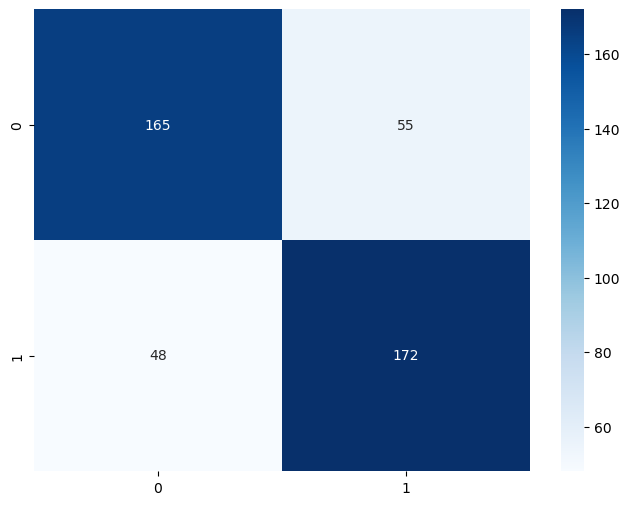

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
# Create heatmap of confusion matrix
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(cm, cmap='Blues', annot=True, fmt='g', ax=ax)